In [5]:
from tp4.tools import *
from tp4.Kohonen.kohonen import *
import json
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [6]:
countries, titles, country_data = csv_to_dict("../europe.csv")
standardized_country_data = standardize_data(country_data)

with open('kohonen-config.json') as f:
    config = json.load(f)

# Acceder a los valores del archivo JSON
k_config = config["k"]
initial_radius = config['initial_radius']
initial_eta = config['initial_eta']
print_neighborhood = config['print_neighborhood']
print_iteration_results = config['print_iteration_results']
initialize_weights_random = config['initialize_weights_random']
max_iterations = config['max_iterations']
threshold = config['threshold']
decay_factor = config['decay_factor']
print_final_results = config['print_final_results']
magic_number = 30

In [ ]:
kohonen = Kohonen(standardized_country_data, k_config, initial_radius, initial_eta, max_iterations, initialize_weights_random,
                  print_neighborhood, print_iteration_results, print_final_results, threshold, decay_factor)
result = kohonen.start()

kohonen.create_neighborhood_gif()

kohonen.plot_heatmap_u_matrix()
kohonen.plot_heatmap_final_entries(False)
kohonen.plot_heatmap_final_entries(True)
for k in range(len(next(iter(country_data.values())))):
    kohonen.plot_heatmap_variable(k, titles[k + 1])


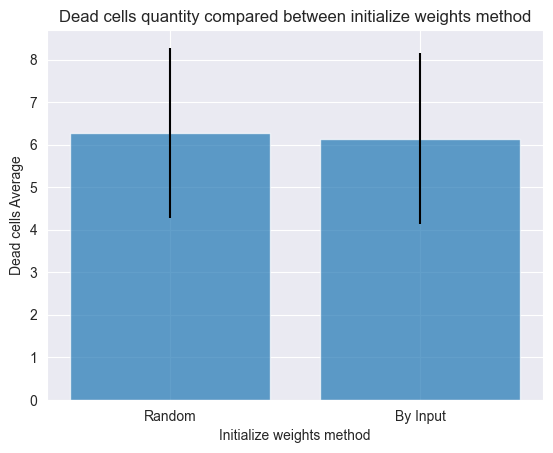

In [7]:
k=6
dead_cells_array = []
errors_array = []

initialize_weights = [True, False]

for init_method in initialize_weights:
    dead_cells = []
    for _ in range(magic_number):
        kohonen = Kohonen(standardized_country_data, k, initial_radius, initial_eta, max_iterations, init_method,
                      False, False, False, threshold, decay_factor)
        result = kohonen.start()

        dead_cells.append(np.sum(result["matrix_winners"] == 0))

    dead_cells_array.append(np.mean(dead_cells))
    errors_array.append(np.std(dead_cells))

plt.bar(["Random", "By Input"], dead_cells_array, yerr=errors_array, align='center', alpha=0.7)
plt.xlabel('Initialize weights method')
plt.ylabel('Dead cells Average')
plt.title('Dead cells quantity compared between initialize weights method')
plt.xticks(["Random", "By Input"])
plt.show()



In [ ]:
initialize_weights = [True, False]
ks = [2, 3, 4, 5, 6, 7, 8, 9]
results_random = []
results_entry = []

for init_method in initialize_weights:
    results = []
    for k in ks:
        dead_cells = 0
        for i in range(magic_number):
            kohonen = Kohonen(standardized_country_data, k, initial_radius, initial_eta, max_iterations, init_method,
                              False, False, False, threshold, decay_factor)
            result = kohonen.start()
            dead_cells += np.sum(result["matrix_winners"] == 0)

        results.append(dead_cells / magic_number)

    if init_method:
        results_random = results
    else:
        results_entry = results

plt.plot(ks, results_random, label='Random')
plt.plot(ks, results_entry, label='By Input')
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Average number of dead units')
plt.title('Average of dead units compared between weight initialization methods')
plt.legend(loc='upper left')

plt.show()


p_results_random = np.array(results_random) * 100 / (np.array(ks) * np.array(ks))
p_results_entry = np.array(results_entry) * 100 / (np.array(ks) * np.array(ks))

plt.plot(ks, p_results_random, label='Random')
plt.plot(ks, p_results_entry, label='By Input')
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Percentage of dead units')
plt.title('Percentage of dead units compared between weight initialization methods')
plt.legend(loc='upper left')

plt.show()

In [ ]:
initialize_weights = [True, False]
ks = [2, 3, 4, 5, 6, 7, 8, 9]
results_random = []
results_entry = []

for init_method in initialize_weights:
    results = []
    for k in ks:
        average_distance = 0
        for i in range(magic_number):
            kohonen = Kohonen(standardized_country_data, k, initial_radius, initial_eta, max_iterations, init_method,
                              False, False, False, threshold, decay_factor)
            result = kohonen.start()
            grid = result["grid"]

            n, m, d = grid.shape

            # Crea una matriz "u" de tamaño "n x m" inicializada con ceros
            u = np.zeros((n, m))

            # Itera sobre cada neurona en el mapa
            for i in range(n):
                for j in range(m):
                    # Calcula los índices de las neuronas vecinas
                    neighbors = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]

                    # Calcula la suma de las distancias euclidianas a las neuronas vecinas
                    dist_sum = 0.0
                    num_neighbors = 0

                    for neighbor in neighbors:
                        ni, nj = neighbor
                        if 0 <= ni < n and 0 <= nj < m:
                            # Calcula la distancia euclidiana entre los vectores de pesos
                            dist = np.linalg.norm(grid[i, j] - grid[ni, nj])
                            dist_sum += dist
                            num_neighbors += 1

                    # Calcula el promedio de las distancias euclidianas
                    if num_neighbors > 0:
                        u[i, j] = dist_sum / num_neighbors

            average_distance += np.mean(u)

        results.append(average_distance / magic_number)

    if init_method:
        results_random = results
    else:
        results_entry = results

plt.plot(ks, results_random, label='Random')
plt.plot(ks, results_entry, label='By Input')
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Average distance between neighbours')
plt.title('Avg dist between neighbours compared between weight init methods')
plt.legend(loc='upper left')

plt.show()

In [ ]:
dfs = [0.999, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9]
results_array = []
errors_array = []


for df in dfs:
    results = []
    for i in range(magic_number):
        kohonen = Kohonen(standardized_country_data, k, initial_radius, initial_eta, max_iterations, initialize_weights_random,
                          False, False, False, threshold, df)
        result = kohonen.start()
        results.append(result["iteration"])

    results_array.append(np.mean(results))
    errors_array.append(np.std(results))

plt.bar(dfs, results_array, yerr=errors_array, width=0.005)
plt.xlabel('Decay factor')
plt.ylabel('Average iteration')
plt.title('Average number of iterations to reach an error less than 1e-4')
plt.xticks(dfs)
plt.ylim(bottom=0)
plt.show()

In [ ]:
ks = [3, 4, 5, 6, 7, 8, 9]
radius = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16]
results_random = []
results_entry = []
magic_number = 30
convergence = np.zeros((len(ks), len(radius)))

for i, k in enumerate(ks):
    for j, r in enumerate(radius):
        avg_iteration = 0
        for _ in range(magic_number):
            kohonen = Kohonen(standardized_country_data, k, r, initial_eta, max_iterations, initialize_weights_random,
                              False, False, False, threshold, decay_factor)
            result = kohonen.start()
            avg_iteration += result["iteration"]

        convergence[i, j] = avg_iteration/magic_number

# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear los arrays de coordenadas x, y, z para la superficie
X, Y = np.meshgrid(radius, ks)
Z = convergence

# Graficar la superficie de velocidad
ax.plot_surface(X, Y, Z, cmap='cool')

# Personalizar los ejes y la etiqueta de la superficie
ax.set_xlabel('Radius')
ax.set_ylabel('k')
ax.set_zlabel('Iterations')

# Ajustar la perspectiva y la posición de visualización
ax.view_init(elev=30, azim=120)  # Modificar los valores según tus necesidades
# Mostrar la figura
plt.show()

In [ ]:
ks = [3, 4, 5, 6, 7, 8, 9]
etas = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
convergence = np.zeros((len(ks), len(etas)))
time_mt = np.zeros((len(ks), len(etas)))

for i, k in enumerate(ks):
    for j, e in enumerate(etas):
        avg_iteration = 0
        start_time = time.perf_counter()
        for _ in range(magic_number):
            kohonen = Kohonen(standardized_country_data, k, initial_radius, e, max_iterations, initialize_weights_random,
                              False, False, False, threshold, decay_factor)
            result = kohonen.start()
            avg_iteration += result["iteration"]

        convergence[i, j] = avg_iteration/magic_number
        end_time = time.perf_counter()
        time_mt[i, j] = end_time - start_time


# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear los arrays de coordenadas x, y, z para la superficie
X, Y = np.meshgrid(etas, ks)
Z = convergence

# Graficar la superficie de velocidad
ax.plot_surface(X, Y, Z, cmap='cool')

# Personalizar los ejes y la etiqueta de la superficie
ax.set_xlabel('Eta')
ax.set_ylabel('k')
ax.set_zlabel('Iterations')

# Ajustar la perspectiva y la posición de visualización
ax.view_init(elev=30, azim=120)  # Modificar los valores según tus necesidades
# Mostrar la figura
plt.show()




# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear los arrays de coordenadas x, y, z para la superficie
X, Y = np.meshgrid(etas, ks)
Z = time_mt

# Graficar la superficie de velocidad
ax.plot_surface(X, Y, Z, cmap='cool')

# Personalizar los ejes y la etiqueta de la superficie
ax.set_xlabel('Eta')
ax.set_ylabel('k')
ax.set_zlabel('Time (s)')

# Ajustar la perspectiva y la posición de visualización
ax.view_init(elev=30, azim=120)  # Modificar los valores según tus necesidades
# Mostrar la figura
plt.show()